# Neural Network with two layer (Relu, sigmoid)

A neural network with two layers (Relu and Sigmoid). This experiment can be applied of any dataset.

## A. Design the System 

1. Initialize the layer size. This experiment has two layers. 

In [1]:
def layer_sizes(X, Y):
    """
    Argument:
    X: The dataset (number of feactures, number of examples)
    Y: labels of shape (output size, number of examples) # because the sigmoid is used , the output shape is (1, m)

    Return:
    n_x -- Number of features in one example
    n_h -- Number of units in first layer
    n_y -- Number of units in output layer (sigmoid = 1)
    """
    n_x = X.shape[0]
    n_y = Y.shape[0]

    return n_x, n_y

2. Initialize the parameters (weights, bias)

In [2]:
def initialize_parameters(n_x, n_h, n_y):
    """
    Argument: 
    n_x -- Number of features in one example
    n_h -- Number of units in first layer
    n_y -- Number of units in output layer (sigmoid = 1)

    Return:
    W1: Weight matrix for layer one with a shape of (n_h, n_x).
    b1: Bais vector of (n_h, 1) shape.
    W2: Weight matrix for layer two with a shape of (n_y, n_h)
    b1: Bais vector of (n_y, 1) shape. 
    """
    np.random.seed(1)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = 0.0
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = 0.0

    parameters = {
        "W1":W1,
        "b1":b1,
        "W2":W2,
        "b2":b2
    }
    return parameters

3. Sigmoid function

In [3]:
def sigmoid(Z):

    A = 1/(1 + np.exp(-Z))

    return A

4. Relu function

In [4]:
def relu(Z):
    
    A = np.maximum(0,Z)
    
    return A

5. Derivative of the sigmoid function

In [5]:
def der_sigmoid(z):
    
    s = 1/(1 + np.exp(-Z))
    
    dZ = s * (1-s)
    
    return dZ

6. Derivative of the Relu function

In [6]:
def der_relu(Z):
    
    dZ = np.where(Z <= 0, 0, 1)
    
    return dZ
    

7. Forward Propagation $Z_1 -> A_1 -> Z_2 -> A_2$ 

In [7]:
def forward_propagation(X, parameters):
    """
    Argument:
    X: the dataset
    parameters: a Python dictionary containing all of the weights and baises
    n_h is the number of hidden layers.

    Return: 
    A: activation function results
    cache: a dictionary containing "Z1", "A1", "Z2", and "A2" is used in the backpropagation stage.
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    Z1 = np.dot(W1, X) + b1
    A1 = relu(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}

    return A2, cache

8. Compute the cost $(A_2, Y)$

In [8]:
def compute_cost(A2, Y):
    """
    Argument:
    A2: output of last layer 
    Y: actual output

    Return:
    cost: cross-entropy cost 
    """

    # Number of examples
    m = Y.shape[1]

    cost = logprobs = np.multiply(np.log(A2), Y) + np.multiply(np.log(1 - A2), 1-Y)
    cost = -np.sum(logprobs) / m
    cost = np.squeeze(cost)

    return cost

9. Back Propagation $(dA_2 -> dZ_2 -> (dW_2, db_2) -> dA_1 - dZ_1 -> (dW_1, db_1)  )$

In [9]:
def backpropagation(parameters, cache, X, Y):
    """
    Argument:
    parameters: A Python dictionary containing all weights and biases
    caches: a Python dictionary contains Z1, A1, Z2, and A2.    
    X: dataset     
    Y: actual output

    Return:

    grads -- python dictionary containing your gradients with respect to different parameters
    """

    m = X.shape[1]

    W1 = parameters["W1"]
    W2 = parameters["W2"]
    
    A1 = cache['A1']
    A2 = cache['A2']

    # dJ/dz = dj/da2 . da2/dz2 = A2-y
    dZ2 = A2 - Y

    # dJ/dw2 = dj/dz2. dz2/dw2 = dZ2 . ((A1.T) = X2)
    dW2 = np.dot(dZ2, A1.T) / m

    # dJ/db2 = dj/dz2. dz2/db2 = 1/m(dZ2 . 1)
    db2 = np.sum(dZ2, axis=1, keepdims=True) / m

    # dJ/dZ1 = dJ/dA1 . dA1/dZ1 = (1-A1)**2
    # Where dJ/dA1 Z2= w2A2+b
    
    # dJ/dA1 
    
    b1 = parameters['b1']
    Z1 = np.dot(W1, X) + b1
    
    
    
    dZ1dA1 = der_relu(Z1) 
     
    
    b2 = parameters['b2'] 
    Z2 = np.dot(W2, A1) + b2
    
#     dA1 = np.dot(W2.T, dZ2) * dZ1dA1
    
  
    dZ1 = np.dot(W2.T ,dZ2) * dZ1dA1

    # dJ/dW1 = dJ/dZ1 . dZ1/dW1 = dZ1.X1
    dW1 = np.dot(dZ1, X.T) / m

    # dJ/db1 = dJ/dZ1 . dZ1/db1 = dZ1.1
    db1 = np.sum(dZ1, axis=1, keepdims=True) / m

    grads = {
        "dW1": dW1,
        "db1": db1,
        "dW2": dW2,
        "db2": db2
    }

    return grads

10. Update the parameters $(W_1,b_1, W_2, b_2)$

In [10]:
def update_prameters(parameters, grads, learning_rate=0.0075):
    """
    Argument: 
    parameters: A Python dictionary containing all weights and biases
    grads: python dictionary containing your gradients with respect to different parameters

    Return:

    parameters: python dictionary containing your updated parameters 

    """

    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]

    dW1 = grads["dW1"]
    db1 = grads["db1"]
    dW2 = grads["dW2"]
    db2 = grads["db2"]

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}

    return parameters

11. The whole model

In [11]:
def nn_model(X, Y, n_h, num_iterations=10000, print_cost=False):
    """
    Argument:
    X: Dataset
    Y: Actual output
    n_h: number of units in first layer
    num_iterations
    print_cost:


    Return:
    parameters: parameters learnt by the model. They can then be used to predict
    """
    np.random.seed(3)
    n_x, n_y = layer_sizes(X, Y)
    
    
    np.random.seed(1)
    parameters = initialize_parameters(n_x, n_h, n_y)
    
    for i in range(num_iterations):
        
        A2, cache = forward_propagation(X, parameters)

        cost = compute_cost(A2, Y)

        grads = backpropagation(parameters, cache, X, Y)

        parameters = update_prameters(parameters, grads)
        
        if i % 1000 == 0 and print_cost:
            print("Cost after iteration %i: %f" %(i, cost))

    return parameters

12. Use the parameters to compute the accuracy. 

In [12]:
def predict(parameters, X, Y):
    
    A2, cache = forward_propagation(X, parameters)

    predictions = A2 > 0.5

    count = 0
    exmaple_num = X.shape[1]
    
    for i in range(exmaple_num):
        if predictions[0, i] == Y[0, i]:
            count += 1

    accuracy = count / exmaple_num

    return accuracy, predictions

## B. Test the system

13. Load the dataset to determine whether an image is of a cat or not

In [13]:
import numpy as np
import h5py
    
def load_dataset():
    
    # load the training data from train_catvnoncat.h5 file
    
    train_dataset = h5py.File('datasets/train_catvnoncat.h5', "r")
    train_set_x_orig = np.array(train_dataset["train_set_x"][:]) # your train set features
    train_set_y_orig = np.array(train_dataset["train_set_y"][:]) # your train set labels

    # load the test data from test_catvnoncat.h5 file
    
    test_dataset = h5py.File('datasets/test_catvnoncat.h5', "r")
    test_set_x_orig = np.array(test_dataset["test_set_x"][:]) # your test set features
    test_set_y_orig = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    # train_set_y_orig.shape = (209,)
    train_set_y_orig = train_set_y_orig.reshape((1, train_set_y_orig.shape[0]))
    # train_set_y_orig.shape = (1,209)
    test_set_y_orig = test_set_y_orig.reshape((1, test_set_y_orig.shape[0]))
    
    return train_set_x_orig, train_set_y_orig, test_set_x_orig, test_set_y_orig, classes

In [14]:
train_set_x_orig, train_set_y, test_set_x_orig, test_set_y, classes = load_dataset()

num_of_sample, width_of_image, heigh_of_image, channel = train_set_x_orig.shape

# Convert (209, 64, 64, 3) to (209, 12288)
train_set_x_flatten = train_set_x_orig.reshape(num_of_sample, width_of_image*heigh_of_image*channel)

# Convert (209, 12288) to (12288, 209) and normalization
train_set_x = train_set_x_flatten.T / 255.

14. Improve the weights

In [15]:
parameters = nn_model(train_set_x, train_set_y, n_h = 8, num_iterations = 10000, print_cost=True)

Cost after iteration 0: 0.695386
Cost after iteration 1000: 0.331197
Cost after iteration 2000: 0.051989
Cost after iteration 3000: 0.019421
Cost after iteration 4000: 0.010584
Cost after iteration 5000: 0.006932
Cost after iteration 6000: 0.005030
Cost after iteration 7000: 0.003891
Cost after iteration 8000: 0.003143
Cost after iteration 9000: 0.002620


15. Calculate the accuracy of the training set.

In [16]:
training_examples_accuracy = predict(parameters, train_set_x, train_set_y)[0]
print("The accuracy of the training example", training_examples_accuracy * 100, "%")

The accuracy of the training example 100.0 %


16. Calculate the accuracy of the test set.

In [17]:
num_of_sample, width_of_image, heigh_of_image, channel = test_set_x_orig.shape

# Convert (50, 64, 64, 3) to (50, 12288)
test_set_x_orig_flatten = test_set_x_orig.reshape(num_of_sample, width_of_image*heigh_of_image*channel)

# Convert (50, 12288) to (12288, 50) and normalization 
test_set_x = test_set_x_orig_flatten.T / 255.

In [18]:
test_examples_accuracy = predict(parameters, test_set_x, test_set_y)[0]
print("The accuracy of the training example", test_examples_accuracy * 100, "%")

The accuracy of the training example 74.0 %


 This image does not contain a cat.


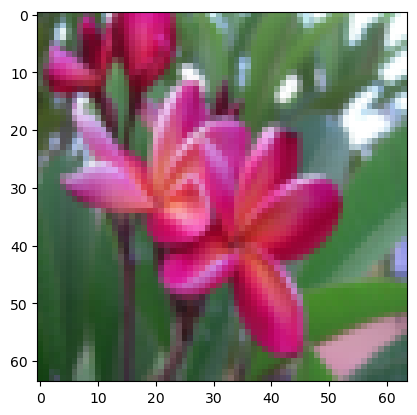

In [32]:
# The system accepts only shapes in the form of (112288, for example).
# As a result, the single example must be converted to (number of features , number of examples). 

import random
index = random.randint(0, 208)

import matplotlib.pyplot as plt
plt.imshow(train_set_x_orig[index])

image = train_set_x[:, index].reshape(-1, 1)
image_y = train_set_y[:, index].reshape(-1, 1)

im = predict(parameters, image, image_y)

if im[1][0][0]:
    print(" This image contains a cat. ")
else:
    print(" This image does not contain a cat.")
    

# print(train_set_y.shape)